## Redes neuronales

In [9]:
import numpy as np
from sklearn.linear_model import SGDClassifier


X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([0, 0, 1, 1])

### Compuerta XOR

In [10]:
model = SGDClassifier(max_iter=1000, tol=1e-3)
model.fit(X, Y)
results = model.predict(X)
print("Entradas: " + str(results))
print("Resultados XOR: " + str(results))

Entradas: [0 0 1 1]
Resultados XOR: [0 0 1 1]


### Neuronas artificiales

Función Z

In [15]:
def calcularZ(w, x, b):
    return np.dot(w, x) + b

Función de activación

In [16]:
def activacion(z):
    prediccion = z
    return prediccion

Neurona

In [22]:
def neurona(z):
    z = calcularZ(w, x, b)
    y_pred = activacion(z)
    return y_pred

Prueba de las funciones

In [23]:
x = np.array([1, 2, 3, 4, 5])
w = np.array([1, 2, 3, 4, 5])
b = 6

z = calcularZ(w, x, b)
z

61

In [24]:
def activacionSigmoide(z):
    y = 1 / (1 + np.exp(-z))
    return y

In [25]:
def neuronaSigmoide(w, x, b):
    z = calcularZ(w, x, b)
    y_pred = activacionSigmoide(z)
    return y_pred

In [27]:
z = neuronaSigmoide(w, x, b)
z

1.0

In [28]:
def activacionTanh(z):
    y = np.tanh(z)
    return y

In [29]:
def neuronaTanh(w, x, b):
    z =calcularZ(w, x, b)
    y_pred = activacionTanh(z)
    return y_pred

In [30]:
z = neuronaTanh(w, x, b)
z

1.0

Ajuste de neuronas

In [31]:
x = np.array([[1,2,3]])
w = np.array([[1,2,3],
              [2,3,4]])
b = np.array([1,
              2])

In [37]:
z = neuronaTanh(w.T, x, b)
z

array([0.99999643, 0.9999985 ])

In [43]:
def generaPesosYBias(size, neurons):
    w = np.random.rand(size, neurons)
    w_transpose = w.T
    b = np.random.rand(neurons)
    return w, b

In [44]:
x = np.array([0,1,2,3,4,3,2,1,0,-1])
w, b = generaPesosYBias(10, 2)
y = neuronaTanh(w.T, x, b)
print(y.shape)

(2,)


### Redes neuronales
No olvidar transponer los pesos en caso de ser necesario (w.T)

In [48]:
x = np.array([0,1,2,3,4,3,2,1,0,-1])
w1,b1 = generaPesosYBias(10,4)
w2,b2 = generaPesosYBias(4,2)

y1 = neuronaTanh(w1.T, x, b1)
y_pred = neuronaSigmoide(w2.T, y1, b2)

print(y_pred)

[0.97078331 0.9032323 ]


In [52]:
from sklearn.neural_network import MLPClassifier

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([0,1,1,0])

redNeuronal = MLPClassifier(hidden_layer_sizes=(4,2),
                           max_iter=20000,
                           activation='logistic',
                           tol=1e-7)

In [64]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action="ignore", category=DeprecationWarning)

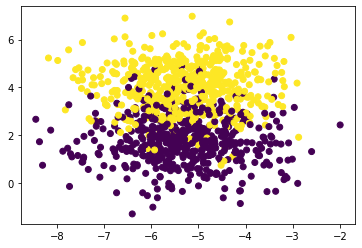

In [65]:
x,y= make_blobs(n_samples=1000, centers=2, n_features=10)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

redNeuronal = MLPClassifier(hidden_layer_sizes=(4,2),
                           max_iter=20000,
                           activation = 'logistic',
                           tol = 1e-7)

redNeuronal.fit(x_train, y_train)
y_pred = redNeuronal.predict(x_test)
print("Entrenamiento completado!")

Entrenamiento completado!


### Salidas one hot

In [71]:
def eval_modelo(y_esperados, y_predichos):
    resultado = confusion_matrix(y_esperados, y_predichos)
    
    diagonal = np.trace(resultado)
    accuracy = (diagonal / y_esperados.shape[0])*100
    
    return accuracy

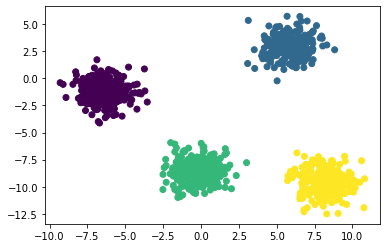

In [72]:
x,y= make_blobs(n_samples=1000, centers=4, n_features=10)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

redNeuronal = MLPClassifier(hidden_layer_sizes=(10,4),
                           max_iter=20000,
                           activation = 'logistic',
                           tol = 1e-7)

redNeuronal.fit(x_train, y_train)
y_pred = redNeuronal.predict(x_test)
print("Entrenamiento completado!")

Entrenamiento completado!


In [74]:
eval_modelo(y_test, y_pred)

100.0

In [115]:
def inicializarCapa(size, neurons):
    w = np.random.rand(neurons, size)
    b = np.random.rand(neurons, 1)
    return w, b

In [116]:
def calcularZ(w, x, b):
    z = np.dot(w, x) + b
    return z

def activacion(z):
    y = 1 / (1 + np.exp(-z))
    return y

def capaNeuronal(w, x, b):
    z = calcularZ(w, x, b)
    y_pred = activacion(z)
    return z, y_pred

In [117]:
def calcularError(y_esperado, y_obtenido):
    numMuestras = y_esperado.shape[0]
    error = - (y_esperado * np.log(y_obtenido) + (1 - y_esperado) * np.log(1 - y_obtenido))
    error = np.sum(error) / numMuestras
    return error

In [118]:
def calcularDerivadas(y_esperado, y_obtenido, entradas):
    dz = y_obtenido - y_esperado
    dw = np.dot(dz, entradas.T)
    db = np.sum(dz, axis=1, keepdims=True)
    return dz, dw, db

#### Compuerta OR

In [120]:
x = np.array([[0,0], [0,1], [1,0], [1,1]]).T
y = np.array([0,1,1,1])
w,b = inicializarCapa(size=2, neurons=1)

# lr -> learning rate
lr = 0.01
minError = 0.05
maxEpoch = 100000

for counter in range(0, maxEpoch):
    z, y_obtenido = capaNeuronal(w, x, b)
    error = calcularError(y, y_obtenido)
    dz, dw, db = calcularDerivadas(y, y_obtenido, x)
    
    w = w - lr * dw
    b = b - lr * db
    
    if(error < minError):
        break;
        
    if counter % 100 == 0:
        print("Epoch: " + str(counter))
        print("Error: " + str(error))

Epoch: 0
Error: 0.4735891309197823
Epoch: 100
Error: 0.3958864855768134
Epoch: 200
Error: 0.35034264077782795
Epoch: 300
Error: 0.31468891721738534
Epoch: 400
Error: 0.28519889202621124
Epoch: 500
Error: 0.2603707059158209
Epoch: 600
Error: 0.23922714163451772
Epoch: 700
Error: 0.22104088414917555
Epoch: 800
Error: 0.20525460518987182
Epoch: 900
Error: 0.19143689770941041
Epoch: 1000
Error: 0.17925083622001153
Epoch: 1100
Error: 0.16843063824244048
Epoch: 1200
Error: 0.158764401083793
Epoch: 1300
Error: 0.15008137553020265
Epoch: 1400
Error: 0.14224256313258046
Epoch: 1500
Error: 0.13513372371527463
Epoch: 1600
Error: 0.12866012836142257
Epoch: 1700
Error: 0.12274258197051843
Epoch: 1800
Error: 0.11731437632122894
Epoch: 1900
Error: 0.11231893154383683
Epoch: 2000
Error: 0.10770795207351923
Epoch: 2100
Error: 0.10343997107588525
Epoch: 2200
Error: 0.09947919118189462
Epoch: 2300
Error: 0.09579455345021973
Epoch: 2400
Error: 0.09235898375931534
Epoch: 2500
Error: 0.08914877835512487
Epo

#### Compuerta AND

In [122]:
x = np.array([[0,0], [0,1], [1,0], [1,1]]).T
y = np.array([0,0,0,1])
w,b = inicializarCapa(size=2, neurons=1)

lr = 0.1
minError = 0.05
maxEpoch = 100000

for counter in range(0, maxEpoch):
    z, y_obtenido = capaNeuronal(w, x, b)
    error = calcularError(y, y_obtenido)
    dz, dw, db = calcularDerivadas(y, y_obtenido, x)
    
    w = w - lr * dw
    b = b - lr * db
    
    if(error < minError):
        break;
        
    if counter % 100 == 0:
        print("Epoch: " + str(counter))
        print("Error: " + str(error))

Epoch: 0
Error: 0.9329407004963278
Epoch: 100
Error: 0.247105756216717
Epoch: 200
Error: 0.16314312148034263
Epoch: 300
Error: 0.12179808392095823
Epoch: 400
Error: 0.09690644653190829
Epoch: 500
Error: 0.08027619533037393
Epoch: 600
Error: 0.06840172791846579
Epoch: 700
Error: 0.059514727594498565
Epoch: 800
Error: 0.05262439257941423


#### Compuerta NOT

In [125]:
x = np.array([0,1]).T
y = np.array([1,0])
w,b = inicializarCapa(size=2, neurons=1)

lr = 0.1
minError = 0.05
maxEpoch = 100000

for counter in range(0, maxEpoch):
    z, y_obtenido = capaNeuronal(w, x, b)
    error = calcularError(y, y_obtenido)
    dz, dw, db = calcularDerivadas(y, y_obtenido, x)
    
    w = w - lr * dw
    b = b - lr * db
    
    if(error < minError):
        break;
        
    if counter % 100 == 0:
        print("Epoch: " + str(counter))
        print("Error: " + str(error))

Epoch: 0
Error: 0.8000304446770787
Epoch: 100
Error: 0.7518074033600588
Epoch: 200
Error: 0.7520384649679581
Epoch: 300
Error: 0.7520386981527318
Epoch: 400
Error: 0.7520386983878999
Epoch: 500
Error: 0.7520386983881373
Epoch: 600
Error: 0.7520386983881373
Epoch: 700
Error: 0.7520386983881373
Epoch: 800
Error: 0.7520386983881373
Epoch: 900
Error: 0.7520386983881373
Epoch: 1000
Error: 0.7520386983881362
Epoch: 1100
Error: 0.7520386983881362
Epoch: 1200
Error: 0.7520386983881362
Epoch: 1300
Error: 0.7520386983881362
Epoch: 1400
Error: 0.7520386983881362
Epoch: 1500
Error: 0.7520386983881362
Epoch: 1600
Error: 0.7520386983881362
Epoch: 1700
Error: 0.7520386983881362
Epoch: 1800
Error: 0.7520386983881362
Epoch: 1900
Error: 0.7520386983881362
Epoch: 2000
Error: 0.752038698388135
Epoch: 2100
Error: 0.752038698388135
Epoch: 2200
Error: 0.752038698388135
Epoch: 2300
Error: 0.752038698388135
Epoch: 2400
Error: 0.752038698388135
Epoch: 2500
Error: 0.752038698388135
Epoch: 2600
Error: 0.752038698

Epoch: 23800
Error: 0.7520386983881279
Epoch: 23900
Error: 0.7520386983881279
Epoch: 24000
Error: 0.7520386983881279
Epoch: 24100
Error: 0.7520386983881279
Epoch: 24200
Error: 0.7520386983881279
Epoch: 24300
Error: 0.7520386983881279
Epoch: 24400
Error: 0.7520386983881279
Epoch: 24500
Error: 0.7520386983881279
Epoch: 24600
Error: 0.7520386983881279
Epoch: 24700
Error: 0.7520386983881279
Epoch: 24800
Error: 0.7520386983881279
Epoch: 24900
Error: 0.7520386983881279
Epoch: 25000
Error: 0.7520386983881279
Epoch: 25100
Error: 0.7520386983881279
Epoch: 25200
Error: 0.7520386983881279
Epoch: 25300
Error: 0.7520386983881279
Epoch: 25400
Error: 0.7520386983881279
Epoch: 25500
Error: 0.7520386983881279
Epoch: 25600
Error: 0.7520386983881279
Epoch: 25700
Error: 0.7520386983881279
Epoch: 25800
Error: 0.7520386983881279
Epoch: 25900
Error: 0.7520386983881279
Epoch: 26000
Error: 0.7520386983881279
Epoch: 26100
Error: 0.7520386983881279
Epoch: 26200
Error: 0.7520386983881279
Epoch: 26300
Error: 0.752

Epoch: 47100
Error: 0.7520386983881279
Epoch: 47200
Error: 0.7520386983881279
Epoch: 47300
Error: 0.7520386983881279
Epoch: 47400
Error: 0.7520386983881279
Epoch: 47500
Error: 0.7520386983881279
Epoch: 47600
Error: 0.7520386983881279
Epoch: 47700
Error: 0.7520386983881279
Epoch: 47800
Error: 0.7520386983881279
Epoch: 47900
Error: 0.7520386983881279
Epoch: 48000
Error: 0.7520386983881279
Epoch: 48100
Error: 0.7520386983881279
Epoch: 48200
Error: 0.7520386983881279
Epoch: 48300
Error: 0.7520386983881279
Epoch: 48400
Error: 0.7520386983881279
Epoch: 48500
Error: 0.7520386983881279
Epoch: 48600
Error: 0.7520386983881279
Epoch: 48700
Error: 0.7520386983881279
Epoch: 48800
Error: 0.7520386983881279
Epoch: 48900
Error: 0.7520386983881279
Epoch: 49000
Error: 0.7520386983881279
Epoch: 49100
Error: 0.7520386983881279
Epoch: 49200
Error: 0.7520386983881279
Epoch: 49300
Error: 0.7520386983881279
Epoch: 49400
Error: 0.7520386983881279
Epoch: 49500
Error: 0.7520386983881279
Epoch: 49600
Error: 0.752

Epoch: 70200
Error: 0.7520386983881657
Epoch: 70300
Error: 0.7520386983881657
Epoch: 70400
Error: 0.7520386983881657
Epoch: 70500
Error: 0.7520386983881657
Epoch: 70600
Error: 0.7520386983881657
Epoch: 70700
Error: 0.7520386983881657
Epoch: 70800
Error: 0.7520386983881657
Epoch: 70900
Error: 0.7520386983881657
Epoch: 71000
Error: 0.7520386983881657
Epoch: 71100
Error: 0.7520386983881657
Epoch: 71200
Error: 0.7520386983881657
Epoch: 71300
Error: 0.7520386983881657
Epoch: 71400
Error: 0.7520386983881657
Epoch: 71500
Error: 0.7520386983881657
Epoch: 71600
Error: 0.7520386983881657
Epoch: 71700
Error: 0.7520386983881657
Epoch: 71800
Error: 0.7520386983881657
Epoch: 71900
Error: 0.7520386983881657
Epoch: 72000
Error: 0.7520386983881657
Epoch: 72100
Error: 0.7520386983881657
Epoch: 72200
Error: 0.7520386983881657
Epoch: 72300
Error: 0.7520386983881657
Epoch: 72400
Error: 0.7520386983881657
Epoch: 72500
Error: 0.7520386983881657
Epoch: 72600
Error: 0.7520386983881657
Epoch: 72700
Error: 0.752

Epoch: 92200
Error: 0.7520386983881657
Epoch: 92300
Error: 0.7520386983881657
Epoch: 92400
Error: 0.7520386983881657
Epoch: 92500
Error: 0.7520386983881657
Epoch: 92600
Error: 0.7520386983881657
Epoch: 92700
Error: 0.7520386983881657
Epoch: 92800
Error: 0.7520386983881657
Epoch: 92900
Error: 0.7520386983881657
Epoch: 93000
Error: 0.7520386983881657
Epoch: 93100
Error: 0.7520386983881657
Epoch: 93200
Error: 0.7520386983881657
Epoch: 93300
Error: 0.7520386983881657
Epoch: 93400
Error: 0.7520386983881657
Epoch: 93500
Error: 0.7520386983881657
Epoch: 93600
Error: 0.7520386983881657
Epoch: 93700
Error: 0.7520386983881657
Epoch: 93800
Error: 0.7520386983881657
Epoch: 93900
Error: 0.7520386983881657
Epoch: 94000
Error: 0.7520386983881657
Epoch: 94100
Error: 0.7520386983881657
Epoch: 94200
Error: 0.7520386983881657
Epoch: 94300
Error: 0.7520386983881657
Epoch: 94400
Error: 0.7520386983881657
Epoch: 94500
Error: 0.7520386983881657
Epoch: 94600
Error: 0.7520386983881657
Epoch: 94700
Error: 0.752

## Retropopagación con entrenamiento multicapa

In [126]:
def calcularDerivadasCapaFinal(y_esperado, y_obtenido, entradaCapaActual, numMuestras):
    dz = y_obtenido - y_esperado
    dw = (1 / numMuestras) * np.dot(dz, entradaCapaActual.T)
    db = (1 / numMuestras) * np.sum(dz, axis=1, keepdims=True)
    return dz, dw, db

In [127]:
def calcularDerivadasCapasIntermedias(dz_capaSiguiente, w_capaSiguiente, salidaCapaActual,
                                      entradaCapaActual, numMuestras):
    dz = np.multiply(np.dot(w_capaSiguiente.T, dz_capaSiguiente), 1 - np.power(salidaCapaActual, 2))
    dw = (1 / numMuestras) * np.dot(dz, entradaCapaActual.T)
    db = (1 / numMuestras) * np. sum(dz, axis=1, keepdims=True)
    return dz, dw, db

In [137]:
x = np.array([[0,0],[0,1],[1,0],[1,1]]).T
y = np.array([0,0,0,1])
w1,b1 = inicializarCapa(size=2, neurons=4)
w2,b2 = inicializarCapa(size=4, neurons=2)

lr = 0.01
minError = 4.0
maxEpochs = 100000
m = x_train.shape[1]

for counter in range(0, maxEpochs):
    z1, a1 = capaNeuronal(w1, x, b1)
    z2, y_obtenido = capaNeuronal(w2, a1, b2)
    error = calcularError(y, y_obtenido)
    dz2, dw2, db2 = calcularDerivadasCapaFinal(y_esperado=y,
                                          y_obtenido = y_obtenido,
                                          entradaCapaActual=a1,
                                          numMuestras=m)
    dz1, dw1, db1 = calcularDerivadasCapasIntermedias(dz_capaSiguiente=dz2,
                                                 w_capaSiguiente=w2,
                                                 salidaCapaActual=a1,
                                                 entradaCapaActual=x,
                                                 numMuestras=m)
    w1 = w1 - lr * dw1
    b1 = b1 - lr * db1
    w2 = w2 - lr * dw2
    b2 = b2 - lr * db2
    
    if(error < minError):
        break

    if counter % 1000 == 0:
        print("Epoch: " + str(counter))
        print("Error: " + str(error))